In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
df = pd.read_csv('C:\\Users\\admin\\Downloads\\archive\\salary_prediction_data.csv')
df.head()


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [6]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None
          Education   Experience  Location Job_Title          Age Gender  \
count          1000  1000.000000      1000      1000  1000.000000   1000   
unique            4          NaN         3         4          NaN      2   
top     High School          NaN  Suburban  Director          NaN   Male   
freq            255          NaN       345       275          NaN    516   
mean            NaN    14.771000       NaN       NaN    42.377000    NaN   
st

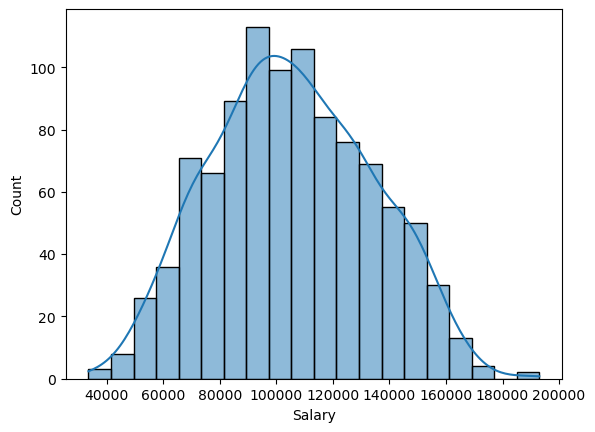

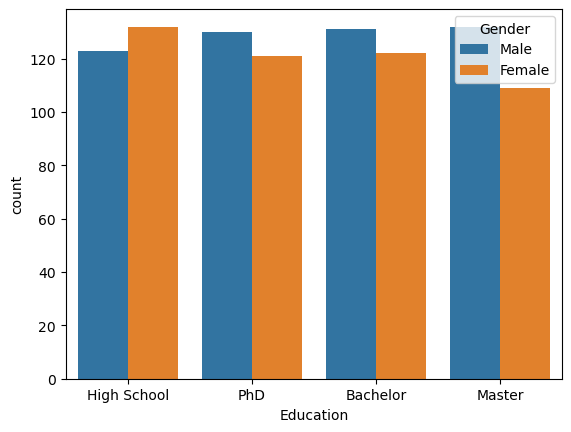

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Salary'], kde=True)
plt.show()

sns.countplot(x='Education', hue='Gender', data=df)
plt.show()


In [8]:
X = df.drop('Salary', axis=1)
y = df['Salary']

categorical = ['Education', 'Location', 'Job_Title', 'Gender']
numeric = ['Experience', 'Age']


In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Categorical and numerical features
categorical = ['Education', 'Location', 'Job_Title', 'Gender']
numerical = ['Experience', 'Age']

# Create ColumnTransformer with safe handling of unknown categories
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical),
    ('num', StandardScaler(), numerical)
])

# Full pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² score: 0.8657143209676157
MSE: 109647822.95174025


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
new = pd.DataFrame([{
    'Experience': 5,
    'Age': 30,
    'Education': 'Masters',
    'Location': 'Urban',
    'Job_Title': 'Engineer',
    'Gender': 'Male'
}])[X.columns]  # Ensures same order and only expected columns

# Now prediction will work
print("Predicted Salary:", round(model.predict(new)[0], 2))


Predicted Salary: 4.0380990535442e+17
